# Actividad 1

Realizado por: Daniela Ines Villalobos Villalobos

**Paso 1 - Cargando librerias importantes**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import GridSearchCV

sns.set()

**Paso 2 - Importando fichero a datafreme**

1) Se carga la información contenida en el archivo .csv
2) Se almacena en el la variable tipo dataFrame "spoty_dataF" por medio del paquete Pandas

In [2]:
spoty_dataF = pd.read_csv('C:/Users/DANIVILL/Downloads/Master Big Data/(MBD-2324) Tecnicas de Programacion/Evaluacion 1/spotify-2023_A1_Ord.csv', sep=',', encoding='latin-1')

**Paso 3 - Datos incompletos en el DF**

1) Exploramos todas las variables categoricas y observamos que las variables "in_shazam_charts" y "key" tiene valores en blanco
2) Se procede a cuantificar los valores nulos y a eliminarlos, ya que estos son minoritarios (representan menos del 5% del dataframe).

In [3]:
spoty_dataF.describe(include="all")

track_name artist(s)_name  artist_count  released_year  released_month  \
count         953            953    953.000000     953.000000      953.000000   
unique        943            645           NaN            NaN             NaN   
top      Daylight   Taylor Swift           NaN            NaN             NaN   
freq            2             34           NaN            NaN             NaN   
mean          NaN            NaN      1.556139    2018.238195        6.033578   
std           NaN            NaN      0.893044      11.116218        3.566435   
min           NaN            NaN      1.000000    1930.000000        1.000000   
25%           NaN            NaN      1.000000    2020.000000        3.000000   
50%           NaN            NaN      1.000000    2022.000000        6.000000   
75%           NaN            NaN      2.000000    2022.000000        9.000000   
max           NaN            NaN      8.000000    2023.000000       12.000000   

        released_day  in_spotify_playlists  in_spotify_charts    streams  \
count     953.000000            953.000000         953.000000        953   
unique           NaN                   NaN                NaN        949   
top              NaN                   NaN                NaN  723894473   
freq             NaN                   NaN                NaN          2   
mean       13.930745           5200.124869          12.009444        NaN   
std         9.201949           7897.608990          19.575992        NaN   
min         1.000000             31.000000           0.000000        NaN   
25%         6.000000            875.000000           0.000000        NaN   
50%        13.000000           2224.000000           3.000000        NaN   
75%        22.000000           5542.000000          16.000000        NaN   
max        31.000000          52898.000000         147.000000        NaN   

        in_apple_playlists  ...         bpm  key   mode danceability_%  \
count           953.000000  ...  953.000000  858    953      953.00000   
unique                 NaN  ...         NaN   11      2            NaN   
top                    NaN  ...         NaN   C#  Major            NaN   
freq                   NaN  ...         NaN  120    550            NaN   
mean             67.812172  ...  122.540399  NaN    NaN       66.96957   
std              86.441493  ...   28.057802  NaN    NaN       14.63061   
min               0.000000  ...   65.000000  NaN    NaN       23.00000   
25%              13.000000  ...  100.000000  NaN    NaN       57.00000   
50%              34.000000  ...  121.000000  NaN    NaN       69.00000   
75%              88.000000  ...  140.000000  NaN    NaN       78.00000   
max             672.000000  ...  206.000000  NaN    NaN       96.00000   

         valence_%    energy_% acousticness_%  instrumentalness_%  liveness_%  \
count   953.000000  953.000000     953.000000          953.000000  953.000000   
unique         NaN         NaN            NaN                 NaN         NaN   
top            NaN         NaN            NaN                 NaN         NaN   
freq           NaN         NaN            NaN                 NaN         NaN   
mean     51.431270   64.279119      27.057712            1.581322   18.213012   
std      23.480632   16.550526      25.996077            8.409800   13.711223   
min       4.000000    9.000000       0.000000            0.000000    3.000000   
25%      32.000000   53.000000       6.000000            0.000000   10.000000   
50%      51.000000   66.000000      18.000000            0.000000   12.000000   
75%      70.000000   77.000000      43.000000            0.000000   24.000000   
max      97.000000   97.000000      97.000000           91.000000   97.000000   

        speechiness_%  
count      953.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean        10.131165  
std          9.912888  
min          2.000000  
25%          4.000000  
50%          6.000000  
75%         11.0000

In [4]:
print(spoty_dataF.isnull().sum())

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


spoty_dataF = spoty_dataF.dropna(axis=0)
print(spoty_dataF.isnull().sum())

**Paso 3 - Verificacion de datos**
1) Se verifica el tipo de datos de cada una de las variables y se procede a modificar a todas las variable a interger
2) La variable "streams" presenta un valor anomalo, por lo que se procede a eliminar toda la fila
3) Las variables "in_deezer_playlists" y "in_shazam_charts" estaban siendo interpretadas como objeto debido a que contenian "," como separadores de miles, por lo que se procede a eliminar ese caracter y posteriormente convertir a interger.

In [5]:
spoty_dataF = spoty_dataF.dropna(axis=0)
spoty_dataF.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [6]:
spoty_dataF = spoty_dataF[spoty_dataF.streams != 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3']

In [7]:
spoty_dataF['streams'] = spoty_dataF['streams'].apply(lambda x: int(x))
spoty_dataF['in_deezer_playlists'] = spoty_dataF['in_deezer_playlists'].str.replace(",", "").astype(int)
spoty_dataF['in_shazam_charts'] = spoty_dataF['in_shazam_charts'].str.replace(",", "").astype(int)
spoty_dataF.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists      int32
in_deezer_charts         int64
in_shazam_charts         int32
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

**Paso 4 - Codificando variables categoricas "key" y "mode" (Dummy Variable)**

1) Se procede a asignar un numero para cada una de las categorias de las variables: 

Key ==> Tiene 11 valores {A = 0, A# = 1, B = 2, C# = 3, D = 4, D# = 5, E = 6, F = 7, F# = 8, G = 9, G# = 10}

Mode ==> Tiene 2 valores {Minor = 0,Major = 1}

2) Finalmente se comprueba que las variables pasan de objeto a interger

In [8]:
spoty_dataF_dummy = spoty_dataF.copy()

In [9]:
spoty_dataF_dummy['key'] = spoty_dataF_dummy['key'].map({'A': 0, 'A#': 1, 'B': 2, 'C#': 3, 'D': 4, 'D#': 5, 'E': 6, 'F': 7, 'F#': 8, 'G': 9, 'G#': 10})
spoty_dataF_dummy['mode'] = spoty_dataF_dummy['mode'].map({'Major': 1, 'Minor': 0})

In [10]:
spoty_dataF_dummy.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists      int32
in_deezer_charts         int64
in_shazam_charts         int32
bpm                      int64
key                      int64
mode                     int64
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

**Paso 5 - Creando varibles streams_log y streams_ees**


PARTE 1
1) Estandarización ==> streams_ees
2) Se debe pasar de 1D array a 2D array para poder utilizar el metodo StandardScaler() de Sklearn

In [11]:
scaler = StandardScaler()

In [12]:
spoty_dataF_final = spoty_dataF_dummy.copy()

In [13]:
streams_ees = spoty_dataF_dummy['streams']

In [14]:
streams_ees.shape

(816,)

In [15]:
streams_ees_matrix = streams_ees.values.reshape(-1,1)

In [16]:
streams_ees_matrix.shape

(816, 1)

In [17]:
scaler.fit(streams_ees_matrix)

StandardScaler()

In [18]:
scaler.transform(streams_ees_matrix)

array([[-6.26626310e-01],
       [-6.41288375e-01],
       [-6.29261568e-01],
       [ 6.34757415e-01],
       [-3.17038076e-01],
       [-5.45669851e-01],
       [ 4.91567226e-01],
       [-7.85829357e-01],
       [-7.14927474e-01],
       [ 1.61911465e-01],
       [ 7.01707060e-02],
       [-7.85627041e-01],
       [-1.55726992e-01],
       [ 1.32765834e+00],
       [ 5.31935669e-02],
       [-2.55856863e-01],
       [-2.02017584e-01],
       [-7.31707066e-01],
       [-7.97332914e-01],
       [-5.13265893e-01],
       [-6.76390729e-01],
       [-7.47284903e-01],
       [ 8.22862652e-01],
       [-7.79907637e-01],
       [-7.48957442e-02],
       [-6.53352756e-01],
       [-8.53862642e-01],
       [-7.97028751e-01],
       [ 7.17229085e-01],
       [ 1.01521866e+00],
       [ 2.86922105e-01],
       [-5.35671368e-01],
       [ 1.69656264e+00],
       [ 6.06718375e-01],
       [-5.59351325e-01],
       [-2.18992003e-01],
       [ 4.47414588e+00],
       [ 1.22501898e+00],
       [ 1.1

In [19]:
spoty_dataF_final['streams_ees'] = streams_ees_matrix

PARTE 2

1) Funcion logarítmica -> streams_log. Se calculo el logaritmo de la variable "streams" y se reemplaza en el dataframe.

In [20]:
streams_log = spoty_dataF_dummy['streams']

In [21]:
spoty_dataF_final['streams_log'] = np.log(spoty_dataF_dummy['streams'])

**Paso 6 - Mapa de calor**

1) Se realiza mapa de calor para determinar la relacion entre variable.
2) Al interpretar la correlacion entre las variables, vemos que "in_spotify_playlist", "in_dreezer_playlist" y "in_apple_playlist" son las que mejor explican el numero de reproducciones. Esto es lógico porque de esta manera los temas tendrán mayor exposición

<Axes: >

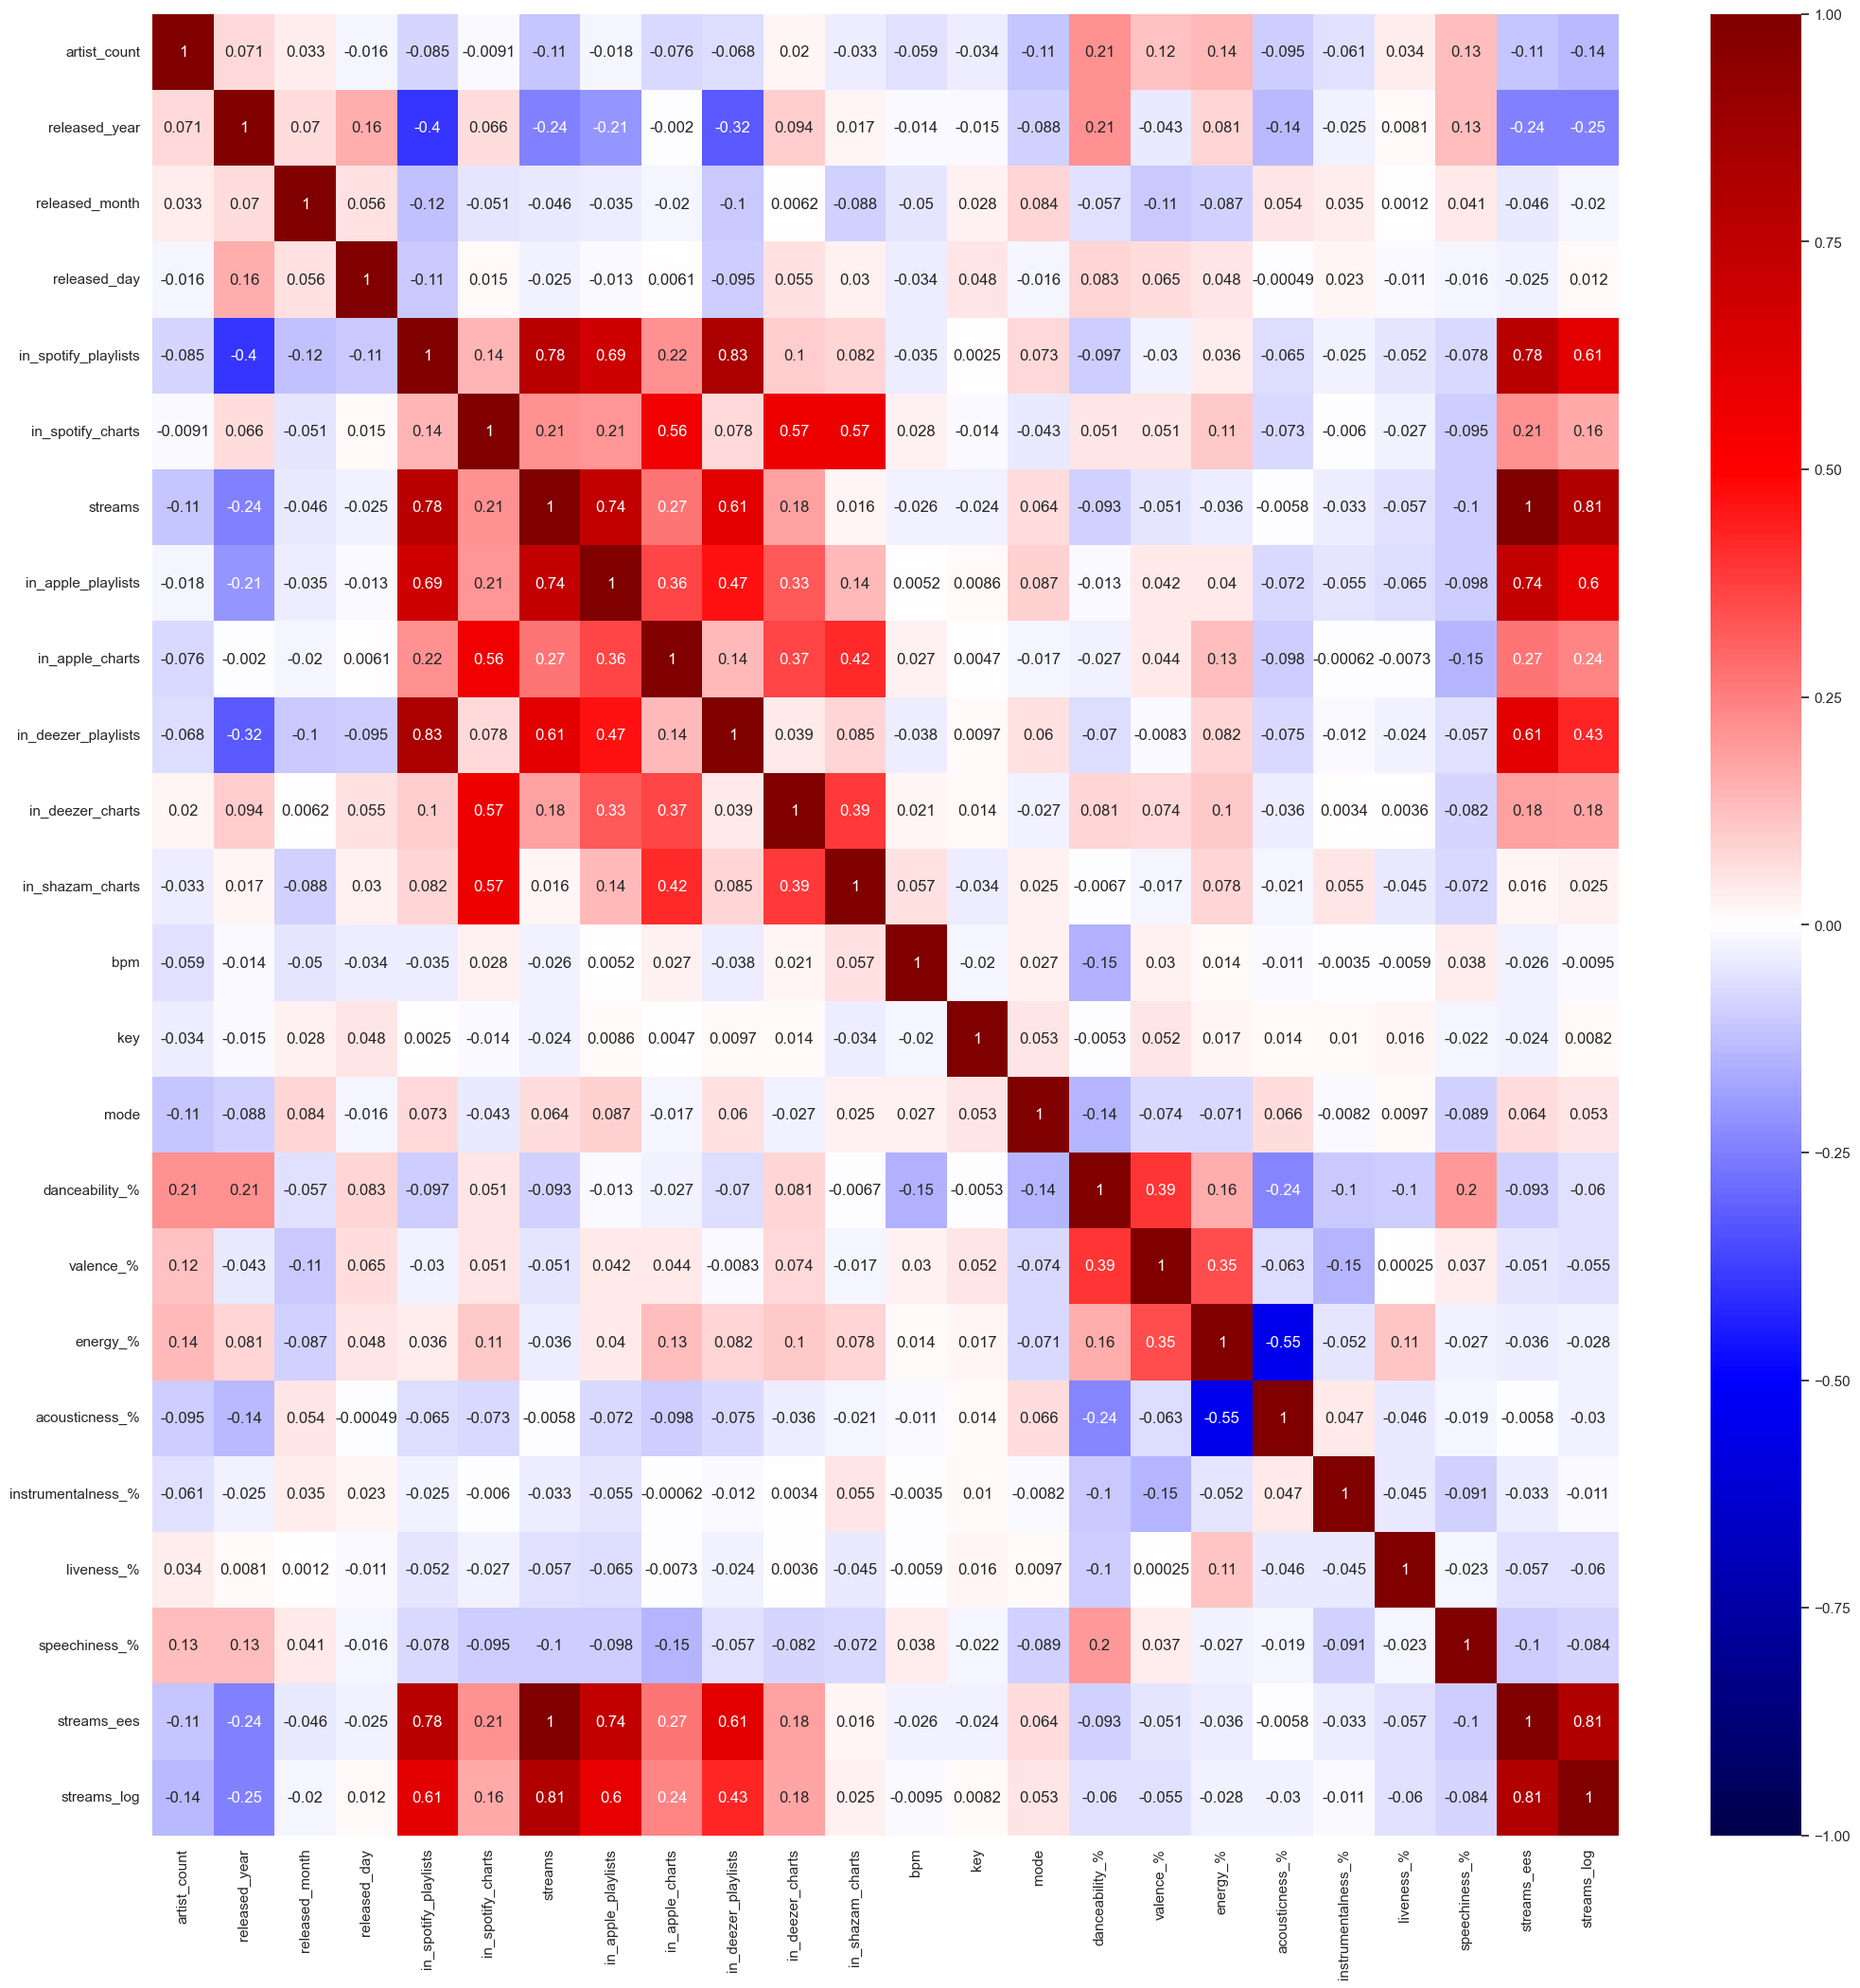

In [22]:
fig, ax = plt.subplots(figsize=(25,25))
corr = spoty_dataF_final.corr(numeric_only='False')
sns.heatmap(corr, cmap="seismic", center=0, vmin=-1, vmax=1, annot=True, ax=ax)

**Paso 7 - Box Plot**

1) Se grafican los diagramas de cajas y bigotes de todas las variables numericas
2) Se calculan las 3 funciones que permiten detectar valores atipicos
3) Se eliminan las variables no numericas para poder aplicar la formula de calculo de valores atipicos
4) Una vez eliminados los valores atipicos, vemos que estos representan alrededor del 20% de las muestras, usando los metodos en base a percentiles 1-99 y en base a la desviación estandar, y alededor del 60% usando el metodo en base al rango intercuartítlico. Por esta razon no se recomienda eliminarlos ni modificarlos. 

Text(0.5, 1.0, 'speechiness_%')

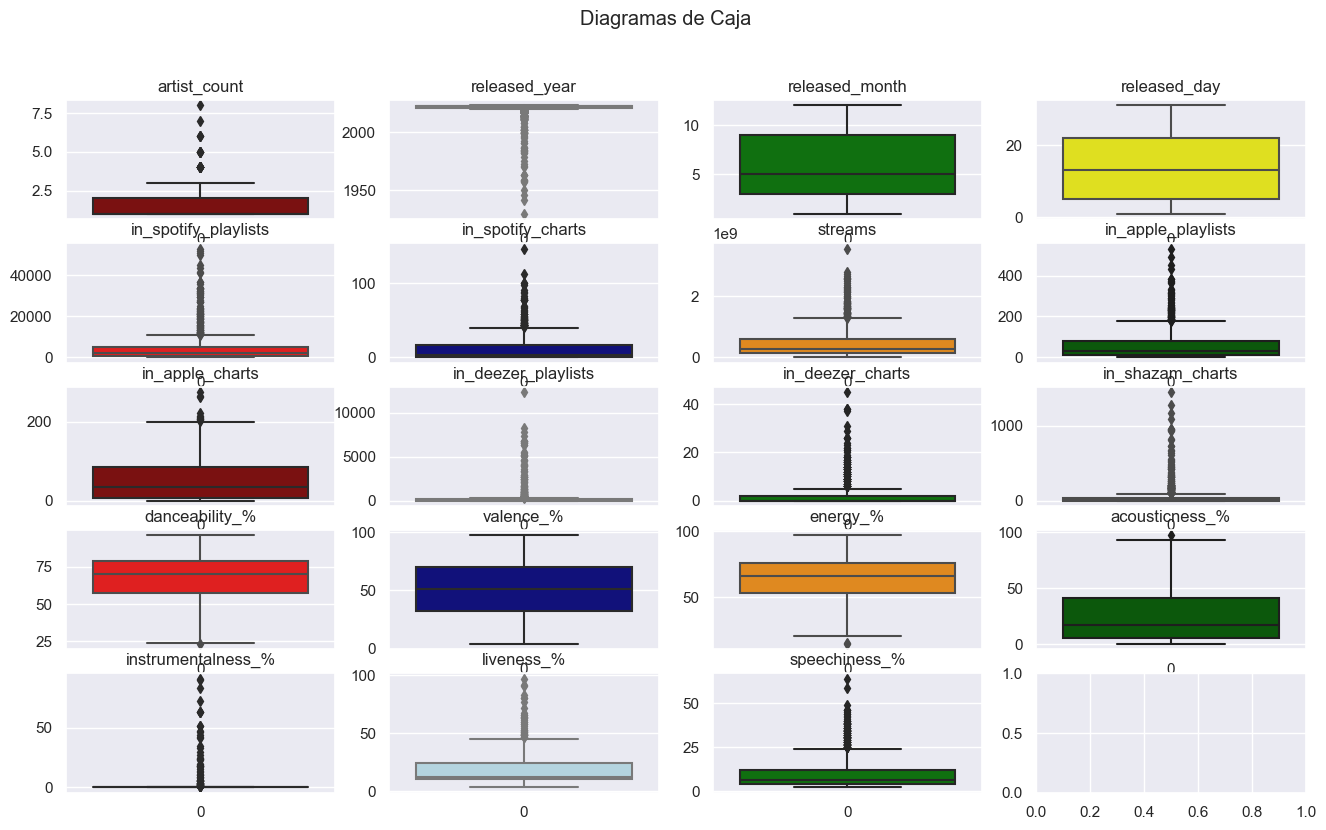

In [23]:
fig, axes = plt.subplots(5, 4, figsize=(16,9))
fig.suptitle('Diagramas de Caja')
sns.boxplot(ax=axes[0,0], data=spoty_dataF_final['artist_count'], color = "darkred")
axes[0,0].set_title("artist_count")
sns.boxplot(ax=axes[0,1], data=spoty_dataF_final['released_year'], color = "lightblue")
axes[0,1].set_title("released_year")
sns.boxplot(ax=axes[0,2], data=spoty_dataF_final['released_month'], color = "green")
axes[0,2].set_title("released_month")
sns.boxplot(ax=axes[0,3], data=spoty_dataF_final['released_day'], color = "yellow")
axes[0,3].set_title("released_day")
sns.boxplot(ax=axes[1,0], data=spoty_dataF_final['in_spotify_playlists'], color = "red")
axes[1,0].set_title("in_spotify_playlists")
sns.boxplot(ax=axes[1,1], data=spoty_dataF_final['in_spotify_charts'], color = "darkblue")
axes[1,1].set_title("in_spotify_charts")
sns.boxplot(ax=axes[1,2], data=spoty_dataF_final['streams'], color = "darkorange")
axes[1,2].set_title("streams")
sns.boxplot(ax=axes[1,3], data=spoty_dataF_final['in_apple_playlists'], color = "darkgreen")
axes[1,3].set_title("in_apple_playlists")
sns.boxplot(ax=axes[2,0], data=spoty_dataF_final['in_apple_charts'], color = "darkred")
axes[2,0].set_title("in_apple_charts")
sns.boxplot(ax=axes[2,1], data=spoty_dataF_final['in_deezer_playlists'], color = "lightblue")
axes[2,1].set_title("in_deezer_playlists")
sns.boxplot(ax=axes[2,2], data=spoty_dataF_final['in_deezer_charts'], color = "green")
axes[2,2].set_title("in_deezer_charts")
sns.boxplot(ax=axes[2,3], data=spoty_dataF_final['in_shazam_charts'], color = "yellow")
axes[2,3].set_title("in_shazam_charts")
sns.boxplot(ax=axes[3,0], data=spoty_dataF_final['danceability_%'], color = "red")
axes[3,0].set_title("danceability_%")
sns.boxplot(ax=axes[3,1], data=spoty_dataF_final['valence_%'], color = "darkblue")
axes[3,1].set_title("valence_%")
sns.boxplot(ax=axes[3,2], data=spoty_dataF_final['energy_%'], color = "darkorange")
axes[3,2].set_title("energy_%")
sns.boxplot(ax=axes[3,3], data=spoty_dataF_final['acousticness_%'], color = "darkgreen")
axes[3,3].set_title("acousticness_%")
sns.boxplot(ax=axes[4,0], data=spoty_dataF_final['instrumentalness_%'], color = "darkred")
axes[4,0].set_title("instrumentalness_%")
sns.boxplot(ax=axes[4,1], data=spoty_dataF_final['liveness_%'], color = "lightblue")
axes[4,1].set_title("liveness_%")
sns.boxplot(ax=axes[4,2], data=spoty_dataF_final['speechiness_%'], color = "green")
axes[4,2].set_title("speechiness_%")

In [24]:
def outliersIQR(s):
    Q1, Q3 = np.percentile(s, [25 ,75])
    IQR = Q3-Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    replace = np.nan
    s = s.where((s >= lower) & (s <= upper), replace)
    return s

In [25]:
def outliersP1P99(s):
    p1, p99 = np.percentile(s, [1 ,99])
    upper = p99
    lower = p1
    replace = np.nan
    s = s.where((s >= lower) & (s <= upper), replace)
    return s

In [26]:
def outliersSTD(s):
    std = np.std(s)
    mean = np.mean(s)
    upper = mean + 3*std
    lower = mean - 3*std
    replace = np.nan
    s = s.where((s >= lower) & (s <= upper))
    return s

In [27]:
x2 = spoty_dataF_final.copy()
x2 = x2.drop (['track_name','artist(s)_name'], axis = 1)

In [28]:
spoty_DF_final =pd.DataFrame()
spoty_DF_final = x2.apply(outliersIQR)
spoty_DF_final

artist_count  released_year  released_month  released_day  \
0             2.0         2023.0               7            14   
1             1.0         2023.0               3            23   
2             1.0         2023.0               6            30   
3             1.0            NaN               8            23   
4             1.0         2023.0               5            18   
..            ...            ...             ...           ...   
948           1.0         2022.0              11             3   
949           1.0         2022.0              10            21   
950           2.0         2022.0              11             3   
951           3.0         2022.0              10            20   
952           1.0         2022.0              11             4   

     in_spotify_playlists  in_spotify_charts      streams  in_apple_playlists  \
0                   553.0                NaN  141381703.0                43.0   
1                  1474.0                NaN  133716286.0                48.0   
2                  1397.0                NaN  140003974.0                94.0   
3                  7858.0                NaN  800840817.0               116.0   
4                  3133.0                NaN  303236322.0                84.0   
..                    ...                ...          ...                 ...   
948                 953.0                0.0   91473363.0                61.0   
949                1180.0                0.0  121871870.0                 4.0   
950                 573.0                0.0   73513683.0                 2.0   
951                1320.0                0.0  133895612.0                29.0   
952                 782.0                2.0   96007391.0                27.0   

     in_apple_charts  in_deezer_playlists  ...  mode  danceability_%  \
0                NaN                 45.0  ...     1            80.0   
1              126.0                 58.0  ...     1            71.0   
2                NaN                 91.0  ...     1            51.0   
3                NaN                125.0  ...     1            55.0   
4              133.0                 87.0  ...     0            65.0   
..               ...                  ...  ...   ...             ...   
948             13.0                 37.0  ...     1            60.0   
949              0.0                  8.0  ...     1            42.0   
950              0.0                  7.0  ...     1            80.0   
951             26.0                 17.0  ...     1            82.0   
952             18.0                 32.0  ...     0            61.0   

     valence_%  energy_%  acousticness_%  instrumentalness_%  liveness_%  \
0           89      83.0            31.0                 0.0         8.0   
1           61      74.0             7.0                 0.0        10.0   
2           32      53.0            17.0                 0.0        31.0   
3           58      72.0            11.0                 0.0        11.0   
4           23      80.0            14.0                 NaN        11.0   
..         ...       ...             ...                 ...         ...   
948         24      39.0            57.0                 0.0         8.0   
949          7      24.0            83.0                 NaN        12.0   
950         81      67.0             4.0                 0.0         8.0   
951         67      77.0             8.0                 0.0        12.0   
952         32      67.0            15.0                 0.0        11.0   

     speechiness_%  streams_ees  streams_log  
0              4.0  141381703.0    18.766974  
1              4.0  133716286.0    18.711231  
2              6.0  140003974.0    18.757181  
3             15.0  800840817.0    20.501173  
4              6.0  303236322.0    19.530023  
..             ...          ...          ...  
948            3.0   91473363.0    18.331558  
949            6.0  121871870.0    18.618481  
950            6.0   73513683.0    18.

In [29]:
spoty_DF = pd.DataFrame()
spoty_DF = spoty_DF_final.dropna()
spoty_DF.reset_index(drop=True, inplace=True)
spoty_DF

artist_count  released_year  released_month  released_day  \
0             3.0         2023.0               6            22   
1             2.0         2023.0               2            10   
2             3.0         2022.0               6            24   
3             1.0         2023.0               7            14   
4             1.0         2023.0               7             7   
..            ...            ...             ...           ...   
321           1.0         2022.0              10            21   
322           1.0         2022.0              11             3   
323           2.0         2022.0              11             3   
324           3.0         2022.0              10            20   
325           1.0         2022.0              11             4   

     in_spotify_playlists  in_spotify_charts      streams  in_apple_playlists  \
0                   332.0               26.0   86444842.0                11.0   
1                   692.0               25.0  354495408.0                10.0   
2                  3107.0               39.0  720434240.0                38.0   
3                   410.0               36.0   14780425.0                36.0   
4                   148.0               24.0   39578178.0                32.0   
..                    ...                ...          ...                 ...   
321                1274.0                0.0  181382590.0                 1.0   
322                 953.0                0.0   91473363.0                61.0   
323                 573.0                0.0   73513683.0                 2.0   
324                1320.0                0.0  133895612.0                29.0   
325                 782.0                2.0   96007391.0                27.0   

     in_apple_charts  in_deezer_playlists  ...  mode  danceability_%  \
0              163.0                 10.0  ...     0            65.0   
1              107.0                  6.0  ...     0            56.0   
2                0.0                  4.0  ...     1            88.0   
3               32.0                 31.0  ...     1            56.0   
4               93.0                  8.0  ...     1            51.0   
..               ...                  ...  ...   ...             ...   
321              6.0                 11.0  ...     1            57.0   
322             13.0                 37.0  ...     1            60.0   
323              0.0                  7.0  ...     1            80.0   
324             26.0                 17.0  ...     1            82.0   
325             18.0                 32.0  ...     0            61.0   

     valence_%  energy_%  acousticness_%  instrumentalness_%  liveness_%  \
0           87      74.0            22.0                 0.0        42.0   
1           84      65.0            23.0                 0.0        10.0   
2           72      59.0            62.0                 0.0         9.0   
3           48      73.0             0.0                 0.0        35.0   
4           22      53.0             1.0                 0.0        15.0   
..         ...       ...             ...                 ...         ...   
321         55      74.0            22.0                 0.0         8.0   
322         24      39.0            57.0                 0.0         8.0   
323         81      67.0             4.0                 0.0         8.0   
324         67      77.0             8.0                 0.0        12.0   
325         32      67.0            15.0                 0.0        11.0   

     speechiness_%  streams_ees  streams_log  
0              4.0   86444842.0    18.275017  
1              6.0  354495408.0    19.686206  
2              3.0  720434240.0    20.395365  
3              4.0   14780425.0    16.508814  
4              3.0   39578178.0    17.493788  
..             ...          ...          ...  
321            4.0  181382590.0    19.016119  
322            3.0   91473363.0    18.331558  
323            6.0   73513683.0    18.

In [30]:
spoty_DF_final =pd.DataFrame()
spoty_DF_final = x2.apply(outliersP1P99)
spoty_DF_final

artist_count  released_year  released_month  released_day  \
0             2.0         2023.0               7            14   
1             1.0         2023.0               3            23   
2             1.0         2023.0               6            30   
3             1.0         2019.0               8            23   
4             1.0         2023.0               5            18   
..            ...            ...             ...           ...   
948           1.0         2022.0              11             3   
949           1.0         2022.0              10            21   
950           2.0         2022.0              11             3   
951           3.0         2022.0              10            20   
952           1.0         2022.0              11             4   

     in_spotify_playlists  in_spotify_charts      streams  in_apple_playlists  \
0                   553.0                NaN  141381703.0                43.0   
1                  1474.0               48.0  133716286.0                48.0   
2                  1397.0                NaN  140003974.0                94.0   
3                  7858.0                NaN  800840817.0               116.0   
4                  3133.0               50.0  303236322.0                84.0   
..                    ...                ...          ...                 ...   
948                 953.0                0.0   91473363.0                61.0   
949                1180.0                0.0  121871870.0                 4.0   
950                 573.0                0.0   73513683.0                 2.0   
951                1320.0                0.0  133895612.0                29.0   
952                 782.0                2.0   96007391.0                27.0   

     in_apple_charts  in_deezer_playlists  ...  mode  danceability_%  \
0                NaN                 45.0  ...     1            80.0   
1              126.0                 58.0  ...     1            71.0   
2                NaN                 91.0  ...     1            51.0   
3                NaN                125.0  ...     1            55.0   
4              133.0                 87.0  ...     0            65.0   
..               ...                  ...  ...   ...             ...   
948             13.0                 37.0  ...     1            60.0   
949              0.0                  8.0  ...     1            42.0   
950              0.0                  7.0  ...     1            80.0   
951             26.0                 17.0  ...     1            82.0   
952             18.0                 32.0  ...     0            61.0   

     valence_%  energy_%  acousticness_%  instrumentalness_%  liveness_%  \
0         89.0      83.0            31.0                 0.0         8.0   
1         61.0      74.0             7.0                 0.0        10.0   
2         32.0      53.0            17.0                 0.0        31.0   
3         58.0      72.0            11.0                 0.0        11.0   
4         23.0      80.0            14.0                 NaN        11.0   
..         ...       ...             ...                 ...         ...   
948       24.0      39.0            57.0                 0.0         8.0   
949        7.0       NaN            83.0                 1.0        12.0   
950       81.0      67.0             4.0                 0.0         8.0   
951       67.0      77.0             8.0                 0.0        12.0   
952       32.0      67.0            15.0                 0.0        11.0   

     speechiness_%  streams_ees  streams_log  
0              4.0  141381703.0    18.766974  
1              4.0  133716286.0    18.711231  
2              6.0  140003974.0    18.757181  
3             15.0  800840817.0    20.501173  
4              6.0  303236322.0    19.530023  
..             ...          ...          ...  
948            3.0   91473363.0    18.331558  
949            6.0  121871870.0    18.618481  
950            6.0   73513683.0    18.

In [31]:
spoty_DF = pd.DataFrame()
spoty_DF = spoty_DF_final.dropna()
spoty_DF.reset_index(drop=True, inplace=True)
spoty_DF

artist_count  released_year  released_month  released_day  \
0             1.0         2023.0               3            23   
1             1.0         2023.0               7             7   
2             2.0         2023.0               3            17   
3             2.0         2023.0               4            17   
4             1.0         2023.0               7             7   
..            ...            ...             ...           ...   
646           1.0         2022.0              10            21   
647           1.0         2022.0              11             3   
648           2.0         2022.0              11             3   
649           3.0         2022.0              10            20   
650           1.0         2022.0              11             4   

     in_spotify_playlists  in_spotify_charts      streams  in_apple_playlists  \
0                  1474.0               48.0  133716286.0                48.0   
1                   714.0               43.0   58149378.0                25.0   
2                  2953.0               44.0  553634067.0                49.0   
3                  2876.0               40.0  505671438.0                41.0   
4                   422.0               55.0   58255150.0                37.0   
..                    ...                ...          ...                 ...   
646                1274.0                0.0  181382590.0                 1.0   
647                 953.0                0.0   91473363.0                61.0   
648                 573.0                0.0   73513683.0                 2.0   
649                1320.0                0.0  133895612.0                29.0   
650                 782.0                2.0   96007391.0                27.0   

     in_apple_charts  in_deezer_playlists  ...  mode  danceability_%  \
0              126.0                 58.0  ...     1            71.0   
1               89.0                 30.0  ...     1            67.0   
2              110.0                 66.0  ...     0            81.0   
3              205.0                 54.0  ...     0            57.0   
4              202.0                 21.0  ...     0            78.0   
..               ...                  ...  ...   ...             ...   
646              6.0                 11.0  ...     1            57.0   
647             13.0                 37.0  ...     1            60.0   
648              0.0                  7.0  ...     1            80.0   
649             26.0                 17.0  ...     1            82.0   
650             18.0                 32.0  ...     0            61.0   

     valence_%  energy_%  acousticness_%  instrumentalness_%  liveness_%  \
0         61.0      74.0             7.0                 0.0        10.0   
1         26.0      71.0            37.0                 0.0        11.0   
2         56.0      48.0            21.0                 0.0         8.0   
3         56.0      72.0            23.0                 0.0        27.0   
4         52.0      82.0            18.0                 0.0        15.0   
..         ...       ...             ...                 ...         ...   
646       55.0      74.0            22.0                 0.0         8.0   
647       24.0      39.0            57.0                 0.0         8.0   
648       81.0      67.0             4.0                 0.0         8.0   
649       67.0      77.0             8.0                 0.0        12.0   
650       32.0      67.0            15.0                 0.0        11.0   

     speechiness_%  streams_ees  streams_log  
0              4.0  133716286.0    18.711231  
1              4.0   58149378.0    17.878526  
2             33.0  553634067.0    20.132014  
3              5.0  505671438.0    20.041398  
4              7.0   58255150.0    17.880343  
..             ...          ...          ...  
646            4.0  181382590.0    19.016119  
647            3.0   91473363.0    18.331558  
648            6.0   73513683.0    18.

In [32]:
spoty_DF_final =pd.DataFrame()
spoty_DF_final = x2.apply(outliersSTD)
spoty_DF_final

artist_count  released_year  released_month  released_day  \
0             2.0         2023.0               7            14   
1             1.0         2023.0               3            23   
2             1.0         2023.0               6            30   
3             1.0         2019.0               8            23   
4             1.0         2023.0               5            18   
..            ...            ...             ...           ...   
948           1.0         2022.0              11             3   
949           1.0         2022.0              10            21   
950           2.0         2022.0              11             3   
951           3.0         2022.0              10            20   
952           1.0         2022.0              11             4   

     in_spotify_playlists  in_spotify_charts      streams  in_apple_playlists  \
0                   553.0                NaN  141381703.0                43.0   
1                  1474.0               48.0  133716286.0                48.0   
2                  1397.0                NaN  140003974.0                94.0   
3                  7858.0                NaN  800840817.0               116.0   
4                  3133.0               50.0  303236322.0                84.0   
..                    ...                ...          ...                 ...   
948                 953.0                0.0   91473363.0                61.0   
949                1180.0                0.0  121871870.0                 4.0   
950                 573.0                0.0   73513683.0                 2.0   
951                1320.0                0.0  133895612.0                29.0   
952                 782.0                2.0   96007391.0                27.0   

     in_apple_charts  in_deezer_playlists  ...  mode  danceability_%  \
0                NaN                 45.0  ...     1            80.0   
1              126.0                 58.0  ...     1            71.0   
2                NaN                 91.0  ...     1            51.0   
3                NaN                125.0  ...     1            55.0   
4              133.0                 87.0  ...     0            65.0   
..               ...                  ...  ...   ...             ...   
948             13.0                 37.0  ...     1            60.0   
949              0.0                  8.0  ...     1            42.0   
950              0.0                  7.0  ...     1            80.0   
951             26.0                 17.0  ...     1            82.0   
952             18.0                 32.0  ...     0            61.0   

     valence_%  energy_%  acousticness_%  instrumentalness_%  liveness_%  \
0           89      83.0              31                 0.0         8.0   
1           61      74.0               7                 0.0        10.0   
2           32      53.0              17                 0.0        31.0   
3           58      72.0              11                 0.0        11.0   
4           23      80.0              14                 NaN        11.0   
..         ...       ...             ...                 ...         ...   
948         24      39.0              57                 0.0         8.0   
949          7      24.0              83                 1.0        12.0   
950         81      67.0               4                 0.0         8.0   
951         67      77.0               8                 0.0        12.0   
952         32      67.0              15                 0.0        11.0   

     speechiness_%  streams_ees  streams_log  
0              4.0  141381703.0    18.766974  
1              4.0  133716286.0    18.711231  
2              6.0  140003974.0    18.757181  
3             15.0  800840817.0    20.501173  
4              6.0  303236322.0    19.530023  
..             ...          ...          ...  
948            3.0   91473363.0    18.331558  
949            6.0  121871870.0    18.618481  
950            6.0   73513683.0    18.

In [33]:
spoty_DF = pd.DataFrame()
spoty_DF = spoty_DF_final.dropna()
spoty_DF.reset_index(drop=True, inplace=True)
spoty_DF

artist_count  released_year  released_month  released_day  \
0             1.0         2023.0               3            23   
1             1.0         2023.0               7             7   
2             2.0         2023.0               3            17   
3             2.0         2023.0               3            31   
4             3.0         2023.0               6            22   
..            ...            ...             ...           ...   
646           1.0         2022.0              11             3   
647           1.0         2022.0              10            21   
648           2.0         2022.0              11             3   
649           3.0         2022.0              10            20   
650           1.0         2022.0              11             4   

     in_spotify_playlists  in_spotify_charts      streams  in_apple_playlists  \
0                  1474.0               48.0  133716286.0                48.0   
1                   714.0               43.0   58149378.0                25.0   
2                  2953.0               44.0  553634067.0                49.0   
3                  2610.0               40.0  335222234.0                43.0   
4                   332.0               26.0   86444842.0                11.0   
..                    ...                ...          ...                 ...   
646                 953.0                0.0   91473363.0                61.0   
647                1180.0                0.0  121871870.0                 4.0   
648                 573.0                0.0   73513683.0                 2.0   
649                1320.0                0.0  133895612.0                29.0   
650                 782.0                2.0   96007391.0                27.0   

     in_apple_charts  in_deezer_playlists  ...  mode  danceability_%  \
0              126.0                 58.0  ...     1            71.0   
1               89.0                 30.0  ...     1            67.0   
2              110.0                 66.0  ...     0            81.0   
3              100.0                 54.0  ...     1            86.0   
4              163.0                 10.0  ...     0            65.0   
..               ...                  ...  ...   ...             ...   
646             13.0                 37.0  ...     1            60.0   
647              0.0                  8.0  ...     1            42.0   
648              0.0                  7.0  ...     1            80.0   
649             26.0                 17.0  ...     1            82.0   
650             18.0                 32.0  ...     0            61.0   

     valence_%  energy_%  acousticness_%  instrumentalness_%  liveness_%  \
0           61      74.0               7                 0.0        10.0   
1           26      71.0              37                 0.0        11.0   
2           56      48.0              21                 0.0         8.0   
3           67      66.0              14                 0.0        12.0   
4           87      74.0              22                 0.0        42.0   
..         ...       ...             ...                 ...         ...   
646         24      39.0              57                 0.0         8.0   
647          7      24.0              83                 1.0        12.0   
648         81      67.0               4                 0.0         8.0   
649         67      77.0               8                 0.0        12.0   
650         32      67.0              15                 0.0        11.0   

     speechiness_%  streams_ees  streams_log  
0              4.0  133716286.0    18.711231  
1              4.0   58149378.0    17.878526  
2             33.0  553634067.0    20.132014  
3             16.0  335222234.0    19.630304  
4              4.0   86444842.0    18.275017  
..             ...          ...          ...  
646            3.0   91473363.0    18.331558  
647            6.0  121871870.0    18.618481  
648            6.0   73513683.0    18.

**Paso 8 - Estadísticas descriptivas (Variable "artist(s)_name")**

Se procede a calcular los estadisticos descriptivos de cada una de las variables agrupadas por "artist(s)_name"

In [34]:
spoty_dataF_final.groupby('artist(s)_name').describe().T

artist(s)_name       (G)I-DLE  21 Savage, Gunna    50 Cent  \
artist_count count   2.000000           1.00000   1.000000   
             mean    1.000000           2.00000   1.000000   
             std     0.000000               NaN        NaN   
             min     1.000000           2.00000   1.000000   
             25%     1.000000           2.00000   1.000000   
...                       ...               ...        ...   
streams_log  min    18.382706          17.92114  20.907854   
             25%    18.525898          17.92114  20.907854   
             50%    18.669090          17.92114  20.907854   
             75%    18.812282          17.92114  20.907854   
             max    18.955474          17.92114  20.907854   

artist(s)_name      A$AP Rocky, Metro Boomin, Roisee  \
artist_count count                          1.000000   
             mean                           3.000000   
             std                                 NaN   
             min                            3.000000   
             25%                            3.000000   
...                                              ...   
streams_log  min                           18.360787   
             25%                           18.360787   
             50%                           18.360787   
             75%                           18.360787   
             max                           18.360787   

artist(s)_name      Abhijay Sharma, Riar Saab      Adele  Aerosmith  \
artist_count count                   1.000000   4.000000   1.000000   
             mean                    2.000000   1.000000   1.000000   
             std                          NaN   0.000000        NaN   
             min                     2.000000   1.000000   1.000000   
             25%                     2.000000   1.000000   1.000000   
...                                       ...        ...        ...   
streams_log  min                    18.078291  19.960157  20.547229   
             25%                    18.078291  20.646141  20.547229   
             50%                    18.078291  20.969448  20.547229   
             75%                    18.078291  21.075678  20.547229   
             max                    18.078291  21.110431  20.547229   

artist(s)_name        Agust D  Aitana, zzoilo  Alec Benjamin  ...  \
artist_count count   1.000000        1.000000       1.000000  ...   
             mean    1.000000        2.000000       1.000000  ...   
             std          NaN             NaN            NaN  ...   
             min     1.000000        2.000000       1.000000  ...   
             25%     1.000000        2.000000       1.000000  ...   
...                       ...             ...            ...  ...   
streams_log  min    18.593038       20.175444      21.041415  ...   
             25%    18.593038       20.175444      21.041415  ...   
             50%    18.593038       20.175444      21.041415  ...   
             75%    18.593038       20.175444      21.041415  ...   
             max    18.593038       20.175444      21.041415  ...   

artist(s)_name      Zï¿½ï¿½ Neto & Crist      a-ha       d4vd  \
artist_count count              1.000000   1.00000   2.000000   
             mean               1.000000   1.00000   1.000000   
             std                     NaN       NaN   0.000000   
             min                1.000000   1.00000   1.000000   
             25%                1.000000   1.00000   1.000000   
...                                  ...       ...        ...   
streams_log  min               18.795401  21.11471  20.269784   
             25%               18.795401  21.11471  20.287320   
             50%               18.795401  21.11471  20.304857   
             75%               18.795401  21.11471  20.322393   
             max               18.795401  21.11471  20.339929   

artist(s)_name      dennis, MC Kevin o Chris  girl in red     j-hope  \
artist_count count                  1.000000   

**Paso 9 - Modelo regresión (streams_log)**

1) Declaramos la variable dependiente "y0" (streams_log) y las variables independientes "x0"

In [35]:
y0 = streams_log.copy()

In [36]:
y0 = streams_log.values.reshape(-1,1)

In [37]:
x0 = spoty_dataF_dummy.copy()

In [38]:
x0 = x0.drop (['streams','track_name','artist(s)_name'], axis = 1)

2) Dividimos la data en test y training

In [39]:
x0_train, x0_test, y0_train, y0_test = train_test_split(x0, y0, test_size=0.3, random_state=365)

3) Creamos la regresión

In [40]:
regression_0 = LinearRegression()

In [41]:
regression_0.fit(x0_train,y0_train)

LinearRegression()

4) Comparamos los valores de la prediccion con los del dataset y graficamos

In [42]:
y0_prediccion = regression_0.predict(x0_train)

In [43]:
plt.scatter(y0_train,y0_prediccion)
plt.xlabel('Target (y0_train)',size=18)
plt.ylabel('Prediction (y0_prediccion)',size=18)
# plt.xlim(6,13)
# plt.ylim(6,13)
plt.show()

**Paso 10 - Modelo regresión (streams_ees)**

1) Declaramos la variable dependiente "y1" (streams_ees) y las variables independientes "x1"

In [44]:
y1 = streams_ees.copy()

In [45]:
y1 = streams_ees.values.reshape(-1,1)

In [46]:
x1 = spoty_dataF_dummy.copy()

In [47]:
x1 = x1.drop (['streams','track_name','artist(s)_name'], axis = 1)

2) Dividimos la data en test y training

In [48]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=365)

3) Creamos la regresión

In [49]:
regression_1 = LinearRegression()

In [50]:
regression_1.fit(x1_train,y1_train)

LinearRegression()

4) Comparamos los valores de la prediccion con los del dataset y graficamos

In [51]:
y1_prediccion = regression_1.predict(x1_train)

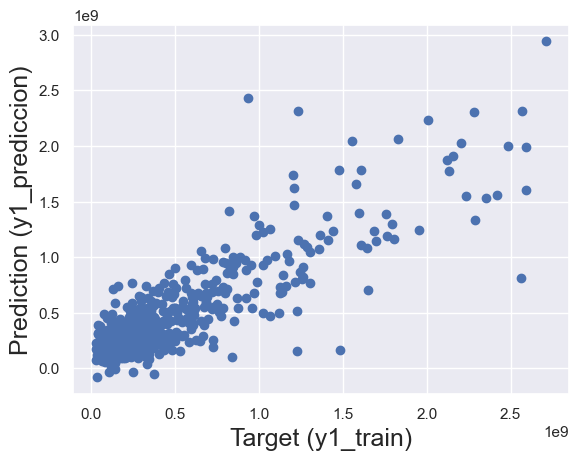

In [52]:
plt.scatter(y1_train,y1_prediccion)
plt.xlabel('Target (y1_train)',size=18)
plt.ylabel('Prediction (y1_prediccion)',size=18)
# plt.xlim(6,13)
# plt.ylim(6,13)
plt.show()

In [54]:
regression_1.score(x1_train,y1_train)

0.7326428284052438

**Conclusion de Regresion**

Analizando la grafica de los valores reales vs la prediccion, observamos que el modelo es bastante cercano a la realidad, si a eso le sumamos un valor de R cuadrado de 0.73, podemos concluir que el modelo es bastante fiable. Por otro lado, vemos que los resultados son identicos en ambos casos, por lo que es indiferente cual de ellas se utiliza. 